In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
####################
# 첫 페이지 크롤링 #
####################

url = 'https://finance.naver.com/item/sise_day.naver?code=041510&page=1'
headers = {'User-Agent':'Mozilla/5.0'}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, 'html.parser')
soup


<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버페이 증권</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script languag

In [3]:
# 증권 속성 추출
title = soup.select('table.type2 > tr > th')
title_list = []
for i in title:
  title_list.append(i.text)
title_list

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']

In [4]:
# 수치 데이터 추출
num_data = soup.select('tr > td > span.tah')
num_data_list = []
for i in num_data:
  num_data_list.append(i.text)
num_data_list # 리스트 첫 번째 항부터 날짜, 종가, 전일비, 시가, 고가, 저가, 거래량 순이며, 그 이후 날짜, 종가 ... 순으로 반복된다고 알 수 있음

['2023.10.25',
 '110,900',
 '\n\t\t\t\t2,100\n\t\t\t\t',
 '114,000',
 '114,600',
 '109,300',
 '195,937',
 '2023.10.24',
 '113,000',
 '\n\t\t\t\t300\n\t\t\t\t',
 '112,500',
 '113,000',
 '106,900',
 '293,835',
 '2023.10.23',
 '112,700',
 '\n\t\t\t\t700\n\t\t\t\t',
 '111,600',
 '114,000',
 '110,800',
 '133,736',
 '2023.10.20',
 '113,400',
 '\n\t\t\t\t2,100\n\t\t\t\t',
 '114,500',
 '116,300',
 '111,500',
 '176,440',
 '2023.10.19',
 '115,500',
 '\n\t\t\t\t5,400\n\t\t\t\t',
 '118,500',
 '119,900',
 '115,200',
 '175,883',
 '2023.10.18',
 '120,900',
 '\n\t\t\t\t900\n\t\t\t\t',
 '121,000',
 '122,200',
 '119,800',
 '97,822',
 '2023.10.17',
 '120,000',
 '\n\t\t\t\t1,400\n\t\t\t\t',
 '123,000',
 '123,400',
 '119,000',
 '131,637',
 '2023.10.16',
 '121,400',
 '\n\t\t\t\t3,200\n\t\t\t\t',
 '122,300',
 '123,600',
 '119,800',
 '176,915',
 '2023.10.13',
 '124,600',
 '\n\t\t\t\t1,600\n\t\t\t\t',
 '126,000',
 '129,400',
 '124,100',
 '119,647',
 '2023.10.12',
 '126,200',
 '\n\t\t\t\t4,500\n\t\t\t\t',
 '123

In [5]:
# 특정 인덱스에 7를 나눈 후 나머지를 통해 각 증권 속성에 대한 데이터를 추출할 수 있음
data_list = [] # 날짜
end_price = [] # 종가
start_price = [] # 시가
up_down_price = [] # 전일비
top_price = [] # 고가
below_price = [] # 저가
trade_price = [] # 거래량
for idx, val in enumerate(num_data_list):
  if idx % 7 == 0: # 날짜
    data_list.append(val)
  elif idx % 7 == 1: # 종가
    end_price.append(int(val.replace(',','')))
  elif idx % 7 == 2: # 전일비
    up_down_price.append(int(val.strip().replace(',','')))
  elif idx % 7 == 3: # 시가
    start_price.append(int(val.replace(',','')))
  elif idx % 7 == 4: # 고가
    top_price.append(int(val.replace(',','')))
  elif idx % 7 == 5: # 저가
    below_price.append(int(val.replace(',','')))
  else: # 거래량
    trade_price.append(int(val.replace(',','')))
up_down_price_result = []
for i, j, k in zip(up_down_price, end_price, start_price):
  if j < k:
    up_down_price_result.append(-i)
  else:
    up_down_price_result.append(i)

In [6]:
# pandas를 이용하여 Dataframe으로 정렬
import pandas as pd

In [7]:
df_dic = {'날짜':data_list,'종가':end_price,'시가':start_price,'전일비':up_down_price_result,'고가':top_price,'저가':below_price,'거래량':trade_price}
df = pd.DataFrame(df_dic)
df

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.10.25,110900,114000,-2100,114600,109300,195937
1,2023.10.24,113000,112500,300,113000,106900,293835
2,2023.10.23,112700,111600,700,114000,110800,133736
3,2023.10.20,113400,114500,-2100,116300,111500,176440
4,2023.10.19,115500,118500,-5400,119900,115200,175883
5,2023.10.18,120900,121000,-900,122200,119800,97822
6,2023.10.17,120000,123000,-1400,123400,119000,131637
7,2023.10.16,121400,122300,-3200,123600,119800,176915
8,2023.10.13,124600,126000,-1600,129400,124100,119647
9,2023.10.12,126200,123900,4500,127800,122400,177649


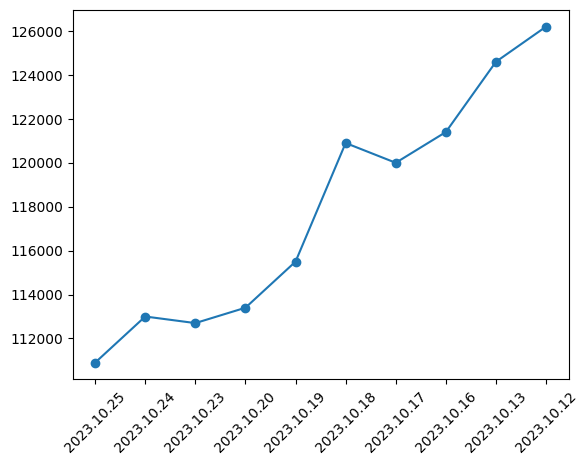

In [8]:
# 시각화
import matplotlib.pyplot as plt
# 종가
plt.plot(df['날짜'], df['종가'])
plt.scatter(df['날짜'], df['종가'])
plt.xticks(ticks=df['날짜'], rotation = 45)
plt.show()

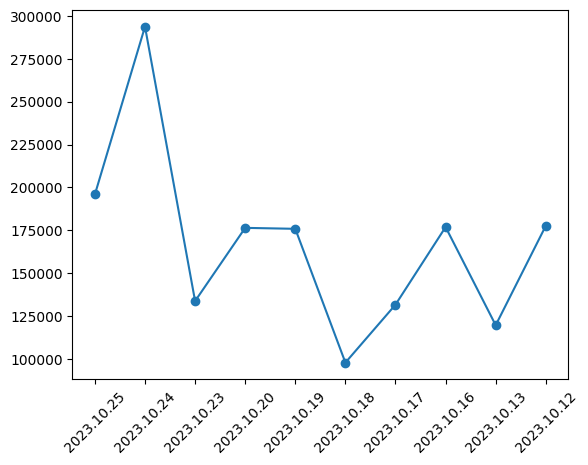

In [9]:
# 거래량
plt.plot(df['날짜'], df['거래량'])
plt.scatter(df['날짜'], df['거래량'])
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()

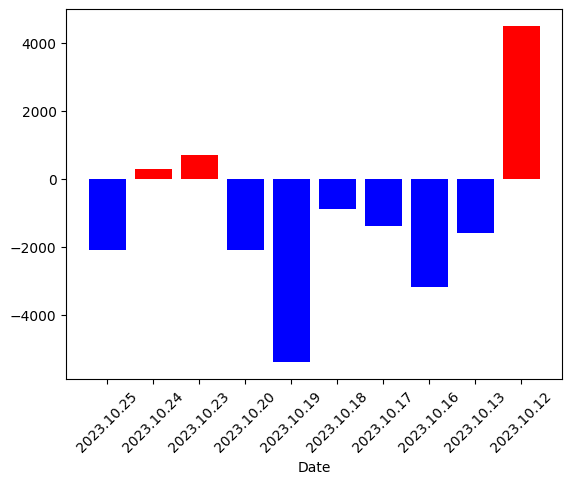

In [10]:
# 전일비
color = []
for i in df['전일비']:
  if i >= 0:
    color.append('red')
  else:
    color.append('blue')
plt.bar(df['날짜'], df['전일비'], color = color)
plt.xlabel('Date')
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()